In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib import pyplot as plt
import json
import sys
import csv

from matplotlib2tikz import save as tikz_save
from matplotlib import rc

plt.style.use('ggplot')

In [2]:
sys.path.append("../inference") # go to parent dir
sys.path.append("../utils") # go to parent dir
from prepare_captions import preprocess_json_files

In [3]:
def load_vocab(dict_file = "../outputs/vocab/5000/coco2014_vocab.json"):
    data = {}
    with open(dict_file, 'r') as f:
        dict_data = json.load(f)
        for k, v in dict_data.items():
            print(k)
            data[k] = v
    data = {int(k): v for k, v in data['idx_to_word'].items()}

    print("Loaded dictionary...")
    print("Dictionary size: {}".format(len(data)))
    return data
vocab = load_vocab()

word_to_idx
idx_to_word
Loaded dictionary...
Dictionary size: 5004


In [4]:
def decode_caption(caption):
    return [vocab[w] for w in caption if w > 3]

In [5]:
def load_caption(image_id, image_dir="../outputs/beam_captions/"):
    if type(image_id) == str:
        filename = "{}{}".format(image_dir, image_id) 
    else:
        filename = "{}{}.json".format(image_dir, image_id) 
    with open(filename, "r") as file:
        return json.load(file)

In [6]:
def load_image_idx_maps():
    with open("../outputs/val_image_id_to_idx.csv") as file:
        csv_file = csv.reader(file)
        image_id_to_index = {}
        index_to_image_id = {}
        for image_index, image_id in csv_file:
            try:
                image_idx = int(image_index)
                image_id = int(image_id)
                image_id_to_index[image_id] = image_idx
                index_to_image_id[image_idx] = image_id
            except:
                print("Error proccessing {}: {}".format(image_id, image_index))
    print("Processed {} images".format(len(image_id_to_index)))
    return image_id_to_index, index_to_image_id
image_id_to_index, index_to_image_id = load_image_idx_maps()

Error proccessing image_id: image_index
Processed 40504 images


In [7]:
def load_annotations():
    annotations = preprocess_json_files("../../annotations/")['captions_val2014.json']
    annotations_dict = {}
    for i in range(len(annotations[0])):
        caption = annotations[0][i]
        image_id = annotations[1][i]
        image_index = image_id_to_index[image_id]
        if image_index in annotations_dict:
            annotations_dict[image_index].append(caption)
        else:
            annotations_dict[image_index] = [caption]
    return annotations_dict
annotations_dict = load_annotations()

Skipping file person_keypoints_train2014.json
Skipping file instances_train2014.json
Skipping file instances_val2014.json
Skipping file person_keypoints_val2014.json


In [8]:
def print_image(image_id, image_dir = "../../val2014_2/val2014/"):
    plt.figure(figsize=(6.7, 6))
    image_path = "{}{}.jpg".format(image_dir, image_id)
    img=mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

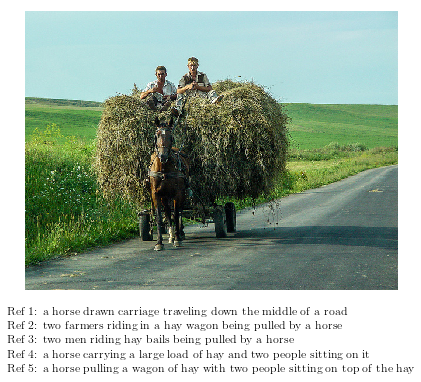

In [17]:
plt.rc('font', **{'family':'serif', 'serif': ['Computer Modern Roman'], 'size': 12})
plt.rc('text', usetex=True)

image_id = 53
print_image(image_id)
captions = [' '.join(c) for c in annotations_dict[image_id]]
for i, caption in enumerate(captions):
    plt.text(-30, 520 + i * 25, "Ref {}: {}".format(i+1, caption))

# tikz_save('../../dissertation/figs/example-image.tikz',
#        figureheight = '\\figureheight',
#        figurewidth = '\\figurewidth')

plt.savefig('../../dissertation/figs/example_image.pdf', dpi=600, bbox_inches='tight')

# Beam size and Bleu-score

In [18]:
beam_sizes = [1,2,10,100]
beam_bleu_scores = [0.2539, 0.2683, 0.2716, 0.2631]
normalised_beam_bleu_scores = [0.2539, 0.26714, 0.2541, 0.2423]
unigram_overlap_bleu_scores = [0.2539, 0.2647, 0.2561, 0.2460]
unigram_precision_bleu_scores = [0.2539, 0.2647, 0.2562, 0.2458]
bigram_overlap_bleu_scores = [0.2539, 0.2682, 0.2723, 0.2713] 
bigram_precision_bleu_scores = [0.2539, 0.2682, 0.2723, 0.2713]
hidden_vector_bleu_scores = [0.2539, 0.2607, 0.2278, 0.1267]

In [40]:
beam_bleu_1_scores = [0.6666, 0.6797, 0.6723, 0.6618]
normalised_beam_bleu_1_scores = [0.6666, 0.6847 , 0.6472 , 0.6310]
unigram_overlap_bleu_1_scores =  [0.6666, 0.6855, 0.6626, 0.6636]
unigram_precision_bleu_1_scores = [0.6666, 0.6854, 0.6631, 0.6646]
bigram_overlap_bleu_1_scores = [0.6666, 0.6820, 0.6736, 0.6719]
bigram_precision_bleu_1_scores = [0.6666, 0.6820, 0.6763, 0.6721]
hidden_vector_bleu_1_scores = [0.6666, 0.6493, 0.6492, 0.5093]

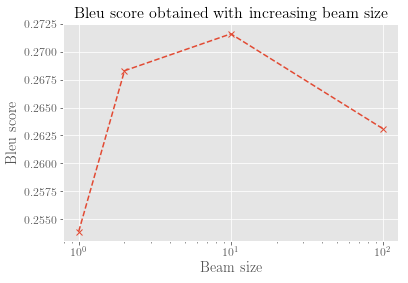

In [46]:
plt.rc('font', **{'family':'serif', 'serif': ['Computer Modern Roman'], 'size': 12})
plt.rc('text', usetex=True)
plt.plot(beam_sizes, beam_bleu_scores, 'x--')
plt.xlabel('Beam size')
plt.ylabel('Bleu score')
plt.xscale('log')
plt.title("Bleu score obtained with increasing beam size", fontsize=16)
plt.savefig('../../dissertation/figs/beam_size_bleu.pdf', dpi=600, bbox_inches='tight')

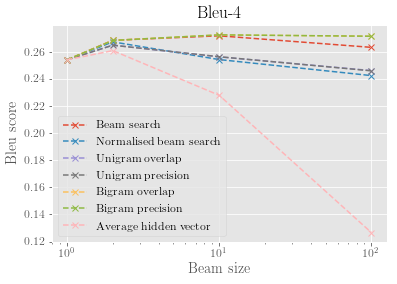

In [49]:
# Bleu 4 scores
plt.rc('font', **{'family':'serif', 'serif': ['Computer Modern Roman'], 'size': 12})
plt.rc('text', usetex=True)
plt.plot(beam_sizes, beam_bleu_scores, 'x--', label='Beam search')
plt.plot(beam_sizes, normalised_beam_bleu_scores, 'x--', label='Normalised beam search')
plt.plot(beam_sizes, unigram_overlap_bleu_scores, 'x--', label='Unigram overlap')
plt.plot(beam_sizes, unigram_precision_bleu_scores, 'x--', label='Unigram precision')
plt.plot(beam_sizes, bigram_overlap_bleu_scores, 'x--', label='Bigram overlap')
plt.plot(beam_sizes, bigram_precision_bleu_scores, 'x--', label='Bigram precision')
plt.plot(beam_sizes, hidden_vector_bleu_scores, 'x--', label='Average hidden vector')

plt.xlabel('Beam size')
plt.ylabel('Bleu score')
plt.xscale('log')
plt.title("Bleu-4")
plt.legend()

plt.savefig('../../dissertation/figs/bleus_4.pdf', dpi=600, bbox_inches='tight')

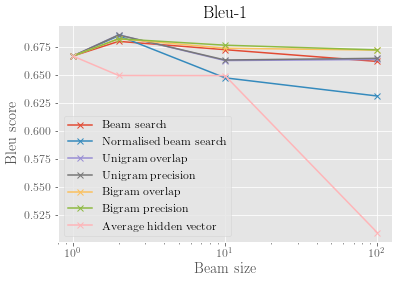

In [48]:
plt.plot(beam_sizes, beam_bleu_1_scores, 'x-', label='Beam search')
plt.plot(beam_sizes, normalised_beam_bleu_1_scores, 'x-', label='Normalised beam search')
plt.plot(beam_sizes, unigram_overlap_bleu_1_scores, 'x-', label='Unigram overlap')
plt.plot(beam_sizes, unigram_precision_bleu_1_scores, 'x-', label='Unigram precision')
plt.plot(beam_sizes, bigram_overlap_bleu_1_scores, 'x-', label='Bigram overlap')
plt.plot(beam_sizes, bigram_precision_bleu_1_scores, 'x-', label='Bigram precision')
plt.plot(beam_sizes, hidden_vector_bleu_1_scores, 'x-', label='Average hidden vector')

plt.xlabel('Beam size')
plt.ylabel('Bleu score')
plt.xscale('log')
plt.title("Bleu-1")
plt.legend()
plt.savefig('../../dissertation/figs/bleus_1.pdf', dpi=600, bbox_inches='tight')